# Polynomial Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('resources/Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
np.unique(dataset['Position'])

array(['Business Analyst', 'C-level', 'CEO', 'Country Manager',
       'Junior Consultant', 'Manager', 'Partner', 'Region Manager',
       'Senior Consultant', 'Senior Partner'], dtype=object)

We see a non linear relationship between Level and Salary

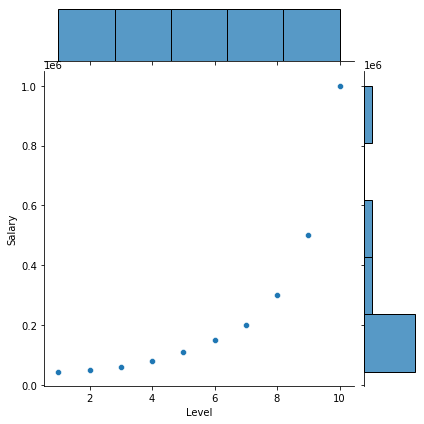

In [4]:
sns.jointplot(data=dataset, x='Level', y='Salary')

## Training the Linear Regression model on the whole dataset

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

## Training the Polynomial Regression model on the whole dataset

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)

# We need to convert the features to polynomial 
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

## Visualize the Linear Regression results

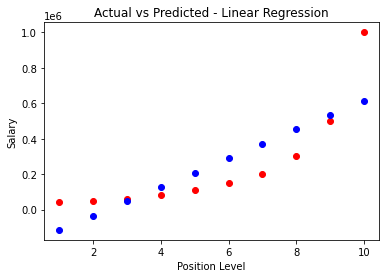

In [7]:
plt.scatter(X, y, color = 'red')
plt.scatter(X, lin_reg.predict(X), color = 'blue')
plt.title('Actual vs Predicted - Linear Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualize the Polynomial Regression Results

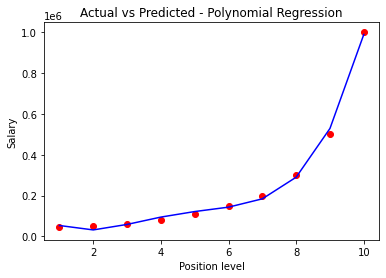

In [8]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Actual vs Predicted - Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

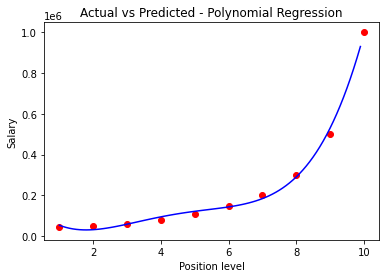

In [9]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Actual vs Predicted - Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result with Linear Regression

In [10]:
lin_reg.predict([[6.5]])

array([330378.78787879])

## Predicting a new result with Polynomial Regression

In [11]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265153])